 ## Trend, seasonal, and residual components

Plot the median house price in Montreal by month.

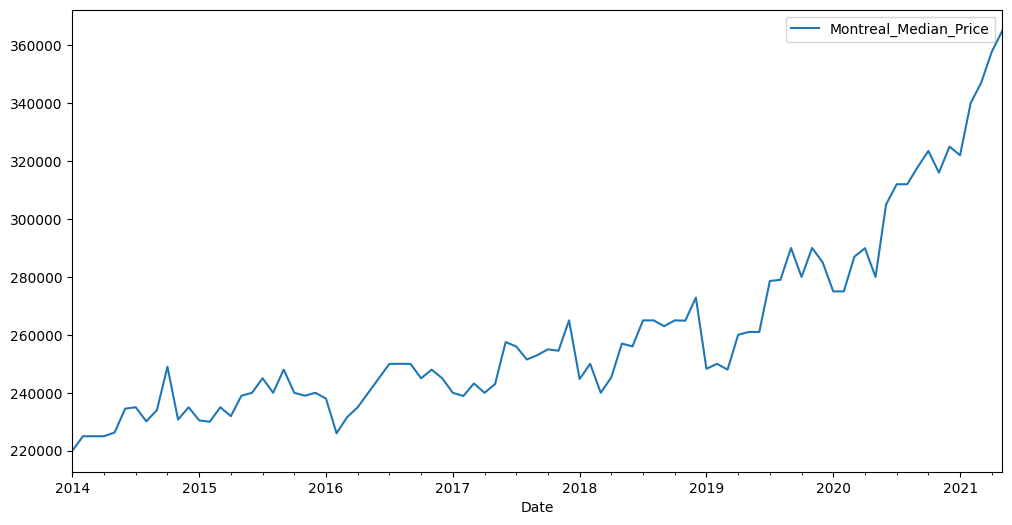

In [1]:
import pandas as pd

data_orig = pd.read_csv('quebec_real_estate.csv')

data_orig['Date'] = pd.to_datetime(data_orig['Date']) # convert date column to DateTime
ax = data_orig.plot(x='Date', y='Montreal_Median_Price', figsize=(12,6))

Plotting a vertical line for January of every year.

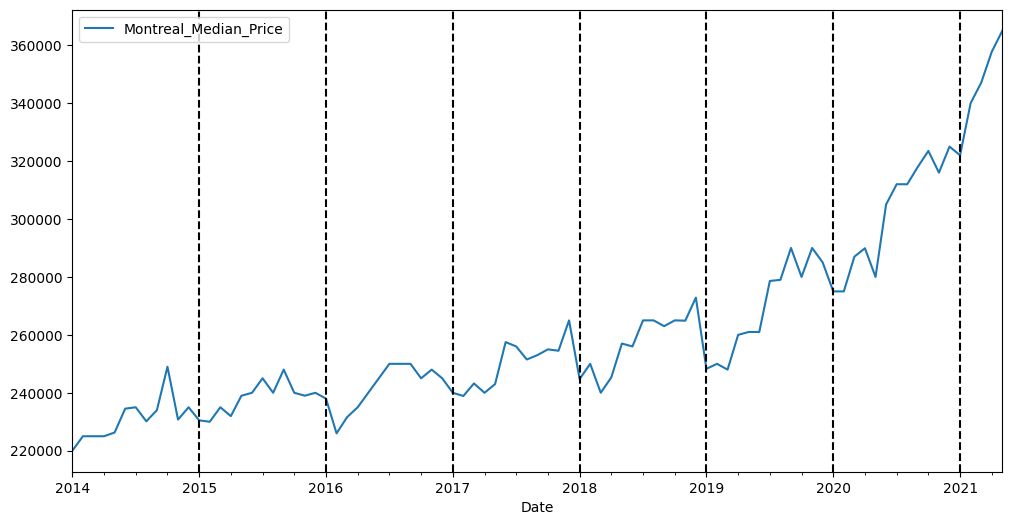

In [2]:
import matplotlib.pyplot as plt

ax = data_orig.plot(x='Date', y='Montreal_Median_Price', figsize=(12,6))
xcoords = ['2015-01-01', '2016-01-01','2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01',
          '2021-01-01']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')

It seems like there’s a trend, and it appears the seasonality has a period of one year. Ee’ll look into a tool we can use to further examine the seasonality and break down our time series into its trend, seasonal, and residual components. 

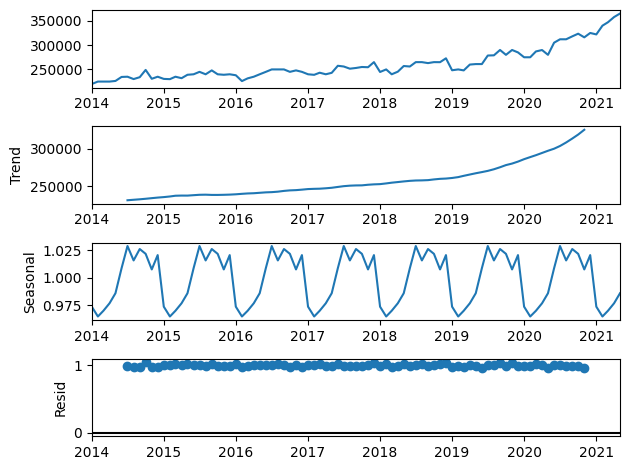

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

data_orig.set_index('Date', inplace=True)

analysis = data_orig[['Montreal_Median_Price']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();